<a href="https://colab.research.google.com/github/GopalSinghRajput/Weather-prediction-ML/blob/main/Weather_prediction_using_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Weather prediction using Random forest and linear regression model***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# **Data Acquisition**
data set link = https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

In [ ]:
globaltemp = pd.read_csv("GlobalTemperatures.csv")
globaltemp.shape

(3192, 9)

In [ ]:
globaltemp.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [ ]:
globaltemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


Cleaning the data set by filling up the null values

In [ ]:
globaltemp.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [ ]:
def wrangle(df):
    df= df.copy()
    df = df.drop(columns=['LandAverageTemperatureUncertainty','LandMaxTemperatureUncertainty','LandMinTemperatureUncertainty','LandAndOceanAverageTemperatureUncertainty'],axis=1)
    def converttemp(x):
        x = (x*1.8)+32
        return float(x)
    
    df['LandAverageTemperature'] = df['LandAverageTemperature'].apply(converttemp)
    df['LandMaxTemperature'] = df['LandMaxTemperature'].apply(converttemp)
    df['LandMinTemperature'] = df['LandMinTemperature'].apply(converttemp)
    df['LandAndOceanAverageTemperature'] = df['LandAndOceanAverageTemperature'].apply(converttemp)
    df['dt'] = pd.to_datetime(df['dt'])
    df['Month'] = df['dt'].dt.month
    df['Year'] = df['dt'].dt.year
    df = df.drop('dt',axis=1)
    df = df.drop('Month',axis=1)
    df = df[df.Year>=1850]
    
    df = df.set_index(['Year'])
    
    df = df.dropna()
    return df

In [ ]:
globaltemp = wrangle(globaltemp)

In [ ]:
globaltemp.head()

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
Year,,,,
1850,33.3482,46.8356,26.2292,55.0994
1850,37.5278,49.9460,27.8762,56.4584
1850,40.9172,50.6246,28.5710,57.2774
1850,44.9906,55.2812,33.8324,58.4006
1850,50.0072,60.1790,38.8598,59.9126


In [ ]:
globaltemp.shape

(1992, 4)

In [ ]:
globaltemp.isnull().sum()

LandAverageTemperature            0
LandMaxTemperature                0
LandMinTemperature                0
LandAndOceanAverageTemperature    0
dtype: int64

Creating a correlation matrix to choose target and features

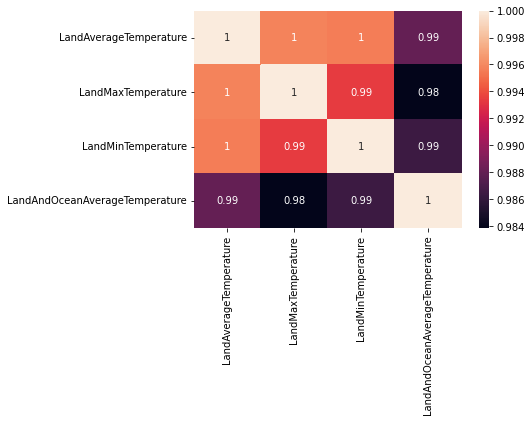

In [ ]:
corrmat = globaltemp.corr()
sns.heatmap(corrmat,annot=True)
plt.show()

In [ ]:
target = 'LandAndOceanAverageTemperature'
Y = globaltemp[target]
X = globaltemp[['LandAverageTemperature','LandMaxTemperature','LandMinTemperature']]

Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(1494, 3)
(498, 3)
(1494,)
(498,)


Making a Baseline Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = [Y_train.mean()]*len(Y_train)
print("Baseline MAE:",round(mean_absolute_error(Y_train,y_pred),5))

Baseline MAE: 2.03719


Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
lm = make_pipeline(StandardScaler(),LinearRegression())
lm.fit(X_train,Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

Random Forest Regressor Model

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
forestmodel = make_pipeline(
SelectKBest(k="all"),StandardScaler(),
RandomForestRegressor(
n_estimators=100,max_depth=50,random_state=77,n_jobs=-1))
forestmodel.fit(X_train,Y_train)

Pipeline(steps=[('selectkbest', SelectKBest(k='all')),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=50, n_jobs=-1,
                                       random_state=77))])

In [ ]:
print("Linear Regression Training MAE",round(mean_absolute_error(Y_train,lm.predict(X_train)),5))
print("Linear Regression Test MAE",round(mean_absolute_error(Y_val,lm.predict(X_val)),5))

Linear Regression Training MAE 0.2803
Linear Regression Test MAE 0.28201


In [ ]:
print("Random forest Regressor model Training MAE:",mean_absolute_error(Y_train,forestmodel.predict(X_train)))
print("Random forest regressor model training MAE:",mean_absolute_error(Y_val,forestmodel.predict(X_val)))

Random forest Regressor model Training MAE: 0.09095256626506251
Random forest regressor model training MAE: 0.2442967590361433


Linear Regression Test/Train Accuracy

In [ ]:
y_pred = lm.predict(X_val)

In [ ]:
errors = abs(y_pred-Y_val)
#mean absolute precentage error (mape)
mape = 100*(errors/Y_train)
accuracy = 100-np.mean(mape)
print("Linear regression model prediction Accuracy:",round(accuracy,2),'%.')

Linear regression model prediction Accuracy: 99.52 %.


Random Forest Regressor Train/Test Accuracy:

In [ ]:
y_pred1 = forestmodel.predict(X_val)

In [ ]:
errors1 = abs(y_pred1-Y_val)
mape1 = 100*(errors1/Y_train)
accuracy1 = 100-np.mean(mape1)
print("Random Forest Regressor model prediction accuracy:",round(accuracy1,2),'%.')

Random Forest Regressor model prediction accuracy: 99.58 %.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params = {'selectkbest__k':range(5)}
rs = RandomizedSearchCV(forestmodel,param_distributions=params,n_iter=5,n_jobs=-1,cv=10)
rs.fit(X_train,Y_train);

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist-packages/

In [ ]:
best_model= rs.best_estimator_

In [ ]:
print("Traning MAE:",mean_absolute_error(Y_train,best_model.predict(X_train)))
print("Validation MAE:",mean_absolute_error(Y_val,best_model.predict(X_val)))

Traning MAE: 0.09095256626506253
Validation MAE: 0.24429675903614326


In [ ]:
y_pred2 = best_model.predict(X_val)

In [ ]:
errors2 = abs(y_pred2-Y_val)
mape2 = 100*(errors/Y_train)
accuracy2 = 100-np.mean(mape)
print("RandomizedSearchCV best model prediction accuracy",round(accuracy2,2),'%.')

RandomizedSearchCV best model prediction accuracy 99.52 %.


In [ ]:
 !pip install eli5 pdpbox category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.0/34.0 MB 36.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=25108a3e13a334a1448605dd28d7bc85e0ec2835fa01f7f0fce55d758f537b26
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35

# Partial Dependence **Plots**

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f54859a9eb0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f548003d880>})

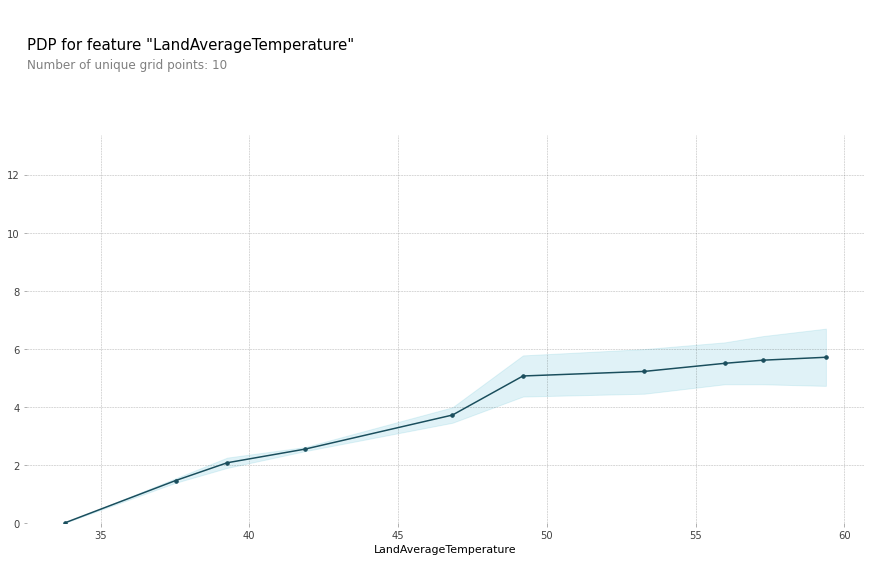

In [ ]:
from pdpbox.pdp import pdp_isolate,pdp_plot
feature='LandAverageTemperature'
isolated = pdp_isolate(model=forestmodel,
                       dataset=X_val,
                       model_features=X_val.columns,
                       feature=feature)
pdp_plot(isolated,feature_name = feature)

From the above plot, the average LandAndOceanTemperature rises and LandAverageTemperature increases, the predicted temperature tends to increase.

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f54800aecd0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f5482f5a160>})

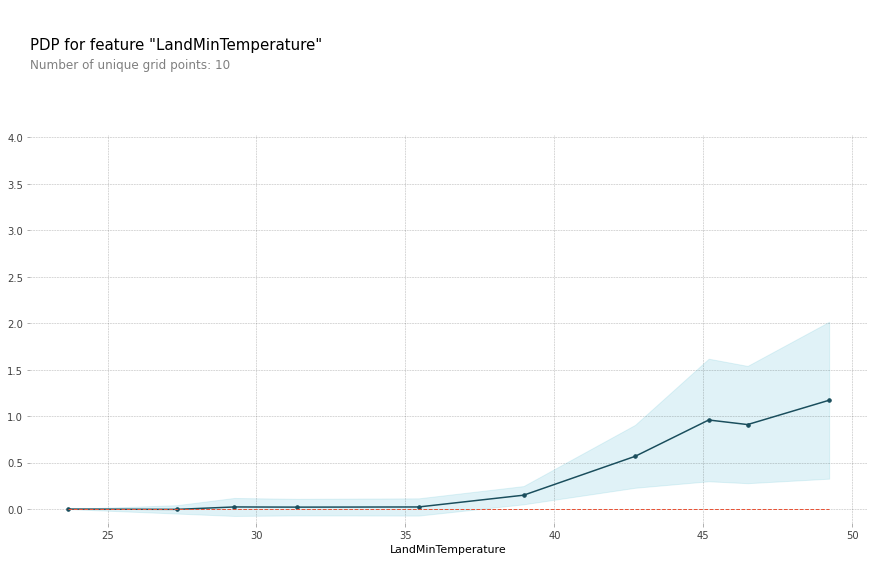

In [ ]:
feature='LandMinTemperature'
isolated = pdp_isolate(model=forestmodel,
                       dataset=X_val,
                       model_features=X_val.columns,
                       feature=feature)
pdp_plot(isolated,feature_name = feature)

From this plot, we can see the same results as well.